# TALLER 2: ANÁLISIS UNIVARIADO

El presente taller pretende presentar dos variables consideradas relevantes para dar solución a la pregunta SMART planteada en el taller 1. Primero se presentarán las variables del conjunto de datos. En segundo lugar, se presentarán las variables seleccionadas para análisis dada su relevancia. Finalmente se presentan las conclusiones del análisis.

CONJUNTO DE DATOS: CONEXIONES ZONA WI-FI DE CALI

El conjunto de datos presenta información diaria del número de conexiones según la zona de conexión para la zona urbana y la zona rural del municipio de Santiago de Cali. Para el análisis no se tendrá en cuenta la zona rural.

Carga de datos

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
from scipy.stats import skew, kurtosis, pearsonr

In [57]:
data = pd.read_csv('Conexiones Zonas Wifi Cali')
data

,Unnamed: 0,FECHA CONEXIÓN,AREA,NOMBRE ZONA,COMUNA,MODEL,NÚMERO CONEXIONES,USAGE (kB),PORCENTAJE USO
0,0,2024-01-01,URBANA,001_ZW Parque Ingenio,17,MR76,42,3709424,4.24352748
1,1,2024-01-01,URBANA,001_ZW Parque Ingenio,17,MR76,49,2550212,2.9174057
2,2,2024-01-01,URBANA,002_ZW Canchas Panamericanas,19,MR76,8,1419251,1.62360265
3,3,2024-01-01,URBANA,003_ZW Parque del Perro,19,MR76,31,558191,0.63856244
4,4,2024-01-01,URBANA,003_ZW Parque del Perro,19,MR76,26,279273,0.31948428
...,...,...,...,...,...,...,...,...,...
13509,13509,2024-06-30,URBANA,054_ZW El Diamante,13,MR76,19,1707901,3.6682913
13510,13510,2024-06-30,URBANA,055_ZW Polideportivo Petecuy,6,MR76,46,18415,0.0395524
13511,13511,2024-06-30,URBANA,055_ZW Polideportivo Petecuy,6,MR76,31,4300,0.00923569
13512,13512,2024-06-30,URBANA,056_ZW Comuna 16,16,MR76,4,35728,0.07673789


Eliminación de columnas consideradas innecesarias

In [58]:
data = data.drop(['Unnamed: 0', 'MODEL', 'PORCENTAJE USO'], axis=1)
data

,FECHA CONEXIÓN,AREA,NOMBRE ZONA,COMUNA,NÚMERO CONEXIONES,USAGE (kB)
0,2024-01-01,URBANA,001_ZW Parque Ingenio,17,42,3709424
1,2024-01-01,URBANA,001_ZW Parque Ingenio,17,49,2550212
2,2024-01-01,URBANA,002_ZW Canchas Panamericanas,19,8,1419251
3,2024-01-01,URBANA,003_ZW Parque del Perro,19,31,558191
4,2024-01-01,URBANA,003_ZW Parque del Perro,19,26,279273
...,...,...,...,...,...,...
13509,2024-06-30,URBANA,054_ZW El Diamante,13,19,1707901
13510,2024-06-30,URBANA,055_ZW Polideportivo Petecuy,6,46,18415
13511,2024-06-30,URBANA,055_ZW Polideportivo Petecuy,6,31,4300
13512,2024-06-30,URBANA,056_ZW Comuna 16,16,4,35728


Filtro por grupo de interés (URBANA), conversión unidad de medida de la columna USAGE (KB); la columna se expresa en GB y agrupando por día.

In [67]:
data_urbana = data[data['AREA'] == 'URBANA']
data_urbana['USAGE (kB)'] = data_urbana['USAGE (kB)'].astype(float)
data_urbana['USAGE (GB)'] = data_urbana['USAGE (kB)'] / 1024 / 1024
data_dia = data_urbana.groupby('FECHA CONEXIÓN').sum()
data_dia = data_dia.drop(['AREA','NOMBRE ZONA', 'COMUNA', 'USAGE (kB)'], axis=1)
data_dia

<ipython-input-67-ff9bbe1b7c68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_urbana['USAGE (kB)'] = data_urbana['USAGE (kB)'].astype(float)
<ipython-input-67-ff9bbe1b7c68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_urbana['USAGE (GB)'] = data_urbana['USAGE (kB)'] / 1024 / 1024


,NÚMERO CONEXIONES,USAGE (GB)
FECHA CONEXIÓN,,
2024-01-01,2378,83.364192
2024-01-02,2107,80.286810
2024-01-03,2356,115.569368
2024-01-04,2217,100.752844
2024-01-05,2552,103.389282
...,...,...
2024-06-26,3979,36.928297
2024-06-27,3824,32.048716
2024-06-28,4413,55.439422


Presentación de variables del conjunto de datos

| Columna | Descripción | Tipo |
|:-----:|:-----:|:-----:|
| FECHA CONEXIÓN | Fecha de la conexión | Cuantitativa Discreta |
| AREA | Área urbana o rural | Cualitativa Nominal |
| NOMBRE ZONA | Nombre de la zona | Cualitativa Nominal |
| COMUNA | Comuna donde se ubica la zona Wi-Fi | Cualitativa Nominal |
| NÚMERO CONEXIONES	| Número de conexiones | Cuantitativa Discreta |
| USAGE (GB) | Uso de la red Wi-FI en Gigabytes | Cuantitativa Continua |

Presentación de variables seleccionadas para análisis univariado

Se seleccionaron las variables "NÚMERO CONEXIONES" y "USAGE (GB)". "NÚMERO CONEXIONES" fue seleccionada dado que esta variable nos presenta información sobre la cantidad de conexiones que se realizaron en el día para la zona. Con esta variable podremos llegar a determinar si existe una relación con la variable "USAGE (GB)", se espera que a mayor número de conexiones mayor número de uso de la red. Por otro lado, se seleccionó la variable "USAGE (GB)" dado que esta es la variable que nos va a permitir tomar deciciones entre si es o no necesario ampliar la capaciudad ténica de la zona según las predicciones de uso de la misma.

Funciones necesarias

In [8]:
def tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

In [6]:
def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

Presentación de variable NÚMERO CONEXIONES"



Tabla 1: Número de Conexiones

In [68]:
tabla_descriptivas(data_dia['NÚMERO CONEXIONES'])

,NÚMERO CONEXIONES
count,182.000000
mean,3151.137363
std,421.528812
min,2106.000000
25%,2885.000000
50%,3155.500000
75%,3367.250000
max,4674.000000
coef. variation,0.133770
skew,0.399562


Gráfico 1: Distribución Número de Conexiones Boxplot


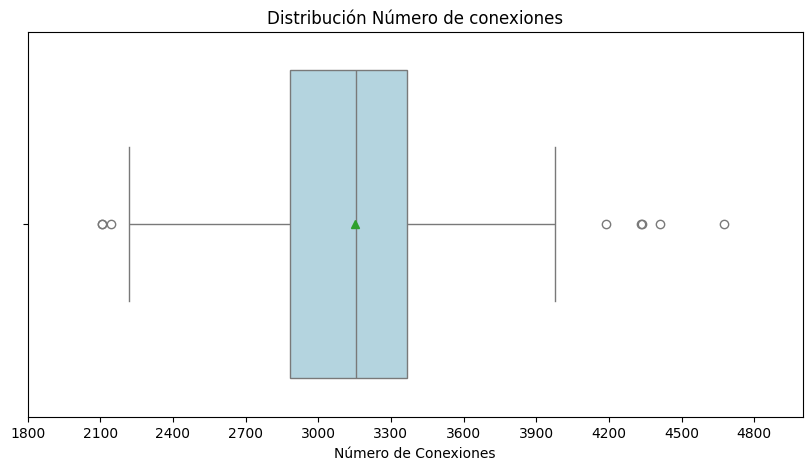

In [72]:
plt.figure(figsize=(10,5))
boxplot_ncone=sns.boxplot(x=data_dia['NÚMERO CONEXIONES'],color="lightblue",showmeans=True)
boxplot_ncone.set_xlabel('Número de Conexiones')
boxplot_ncone.set_xlim(1800, 5000)
boxplot_ncone.set_xticks(range(1800, 5000, 300))
boxplot_ncone.set_title('Distribución Número de conexiones')
plt.show()

Gráfico 2: Distribución Número de Conexiones Histograma

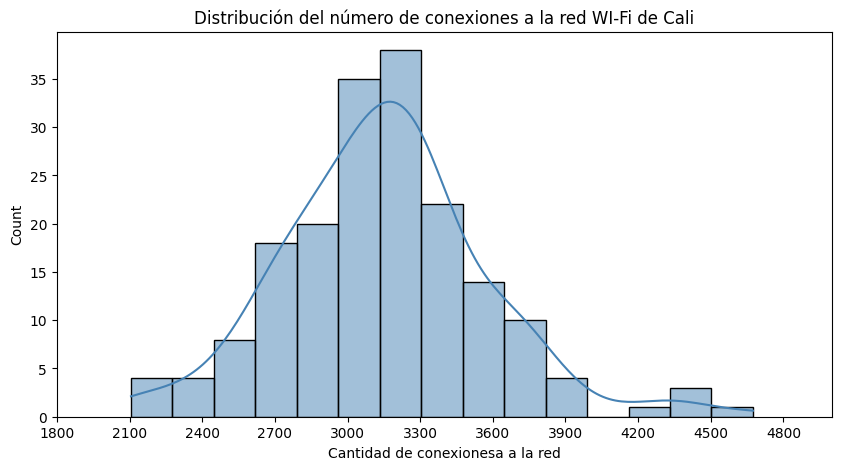

In [81]:
plt.figure(figsize=(10,5))
hist_ncone=sns.histplot(x=data_dia['NÚMERO CONEXIONES'],kde=True,color="steelblue",bins = 15)
hist_ncone.set_xlabel('Cantidad de conexionesa a la red')
hist_ncone.set_xlim(1800, 5000)
hist_ncone.set_xticks(range(1800, 5000, 300))
hist_ncone.set_title('Distribución del número de conexiones a la red WI-Fi de Cali')
plt.show()

De acuerdo a la tabla 1, el gráfico 1 y 2, se puede observar que el 50% de los datos de la variable "NÚMERO CONEXIONES" están agrupados entre las 2106 y 3367 conexiones. El conjunto de datos tiene algunos outliers a izquierda y derecha. Finalmente, los datos tienen un ligero sesgo a la derecha. En el análisis bivariado se evaluará si existe una correlación entre la cantidad de conexiones y el uso de la red.

Presentación de variable "USAGE (GB)"


Tabla 2: Consumo en GB

In [74]:
tabla_descriptivas(data_dia['USAGE (GB)'])

,USAGE (GB)
count,182.000000
mean,86.401809
std,34.881205
min,20.676723
25%,59.503880
50%,83.317057
75%,111.478727
max,175.165821
coef. variation,0.403709
skew,0.335971


Gráfico 3: Distribución uso de la red GB Boxplot

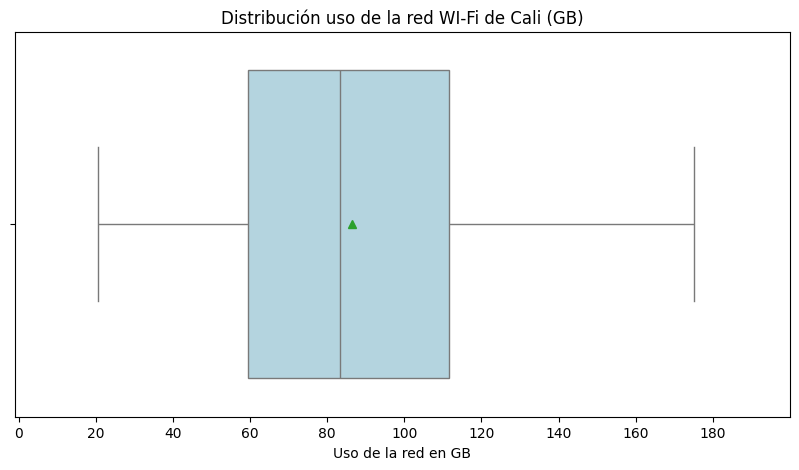

In [82]:
plt.figure(figsize=(10,5))
boxplot_usage=sns.boxplot(x=data_dia['USAGE (GB)'],color="lightblue",showmeans=True)
boxplot_usage.set_xlabel('Uso de la red en GB')
boxplot_usage.set_xlim(-1, 200)
boxplot_usage.set_xticks(range(0, 200, 20))
boxplot_usage.set_title('Distribución uso de la red WI-Fi de Cali (GB)')
plt.show()

Gráfico 4: Distribución uso de la red GB Histograma

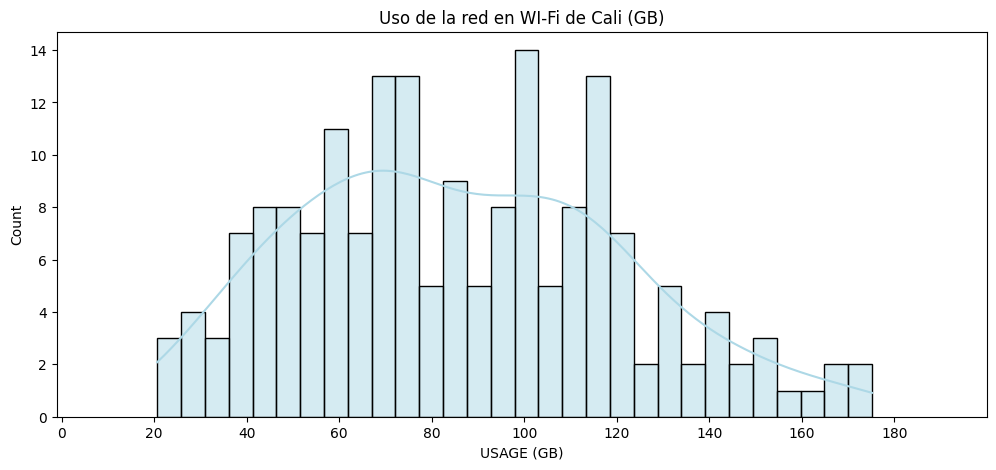

In [83]:
plt.figure(figsize=(12,5))
hist_usage=sns.histplot(x=data_dia['USAGE (GB)'],kde=True,color="lightblue", bins = 30)
hist_usage.set_xlabel('USAGE (GB)')
hist_usage.set_xlim(-1, 200)
hist_usage.set_xticks(range(0, 200, 20))
hist_usage.set_title('Uso de la red en WI-Fi de Cali (GB)')
plt.show()

De acuerdo a la tabla 2, el gráfico 3 y 4, se puede observar que el 50% de los datos de la variable "USAGE (GB)" están agrupados entre 59.5 y 111.48 GB de uso de la red. Finalmente, el gráfico 4 nos permite observar que los datos son achatados con poca volatilidad en sus datos.

# CONCLUSIÓN

El conjunto "Conexiones Zonas Wi-Fi Cali" presenta información diaria del número de conexiones según la zona de conexión para la zona urbana y la zona rural del municipio de Santiago de Cali. Para el análisis no se tuvo en cuenta la zona rural. Se seleccionaron dos variables para el análisis univariado. La primera "NÚMERO CONEXIONES". La variable es una variable cantitativa discreta que representa la cantidad de conexiones registradas a la red Wi-Fi estudiada.

La segunda variable seleccionada fue "USAGE (kB)", que, luego de el cambio de unidad de medida se convirtió en "USAGE (GB)". Se implementó el cambio de unidad de medida para facilitar el análisis. La variable es de tipo cuantitativa continua y representa el consumo/uso en GB de la red Wi-Fi del estudio.

Luego reprentar las variables en tabla y de manera gráfica se concluye que: 1. La variable "NÚMERO CONEXIONES" agrupa el 50% de los datos entre las 2106 y 3367 conexiones, 2. Posee un ligero sesgo a la derecha y 3. Posee datos atipicos a izquierda y derecha.

Por otra parte, luego de analizar la variable "USAGE (kB)" se concluye que: 1. La variable "USAGE (kB)" que agrupa el 50% de los datos entre 59.5 y 111.48 GB de uso de red, 2. Los datos presentan una forma achatada y 3. Sin datos atipicos.

En el siguiente ejercicio se buscarán correlaciones que permitan predecir el consumo de la red para el primer semestre de 2025. Se cree que el número de conexiones podría ser un predictor del uso de la red.